# CSCS530 Midterm

#### Ruoyan Sun
#### April 27, 2015

## Introduction

Tobacco has been a focus of public health interventions for decades but still remains as the single largest preventable cause of disease and premature death in the US. Studies have shown that tobacco consumption can lead to adverse health consequences such as health disease, pulmonary disease and adverse reproductive outcomes. Tobacco consumption is the primary casusal factor for at least 30% of all cancer deaths. In addition, in the US alone, cigarette smoking has been estimated to casue 443,000 deaths per year. Despite the successful recognition of smoking as a health issue and decades of public health interventions, the prevalence level of smoking in the US remains high, around 18% for adults in recent years. 

One of the reasons that we have failed to decrease tobacco consumption more could be that we overlooked the impact of social interactions on smoking behaviors. Studies have shown that peer effect exists in smoking. Then ignoring the social contagion nature of smoking initiation and cessation will produce biased and inaccurate results. 

Social network analysis provides the possibility to include human interactions into the model. The network approach focuses on the structure character of networks and the implications of social interactions among actors in the network. However, social network takes a more societal approach and fails to address individual behaviors, which resulting in emergence of smoking cessation and initiation. The emergent behaviors theory offers the explanation of complex social phenomenon. It considers that behaviors appears at a given level of organization may be characterized as arising from an organizationally lower level in such a way that it transcends a mere increase in the behavioral degree of complexity. In another word, in our case, individual level behaviors can construct a complex systems at the societal level. In order to construct such a societal model, we use ABM in the project. ABM is a useful tool to analyze individuals since it treats each social actor as an agent and allows macro-level behavioral patterns to emerge form explicitly described micro-level behaviors and interactions. In sum, this project combines social networks with ABM to study the impact of social networks on smoking behaviors. And we will test the effectiveness of a prevention program on smoking cessation. The prevention program decreases the chance of smoking initiation for nonsmokers and increase smoking cessation for smokers. 

## Method
First I constructed a social network. There are many different structures of social network. I picked the Barabasi-Albert preferntial attachment model because I think this graph does a good job at describing the real life phenomenon where people with more connections tend to make more new friends. Originally I planned to have a sample size of 10000 nodes, due to the quality of visual graphs, I decided to limit the sample size to 100 nodes with a number of 2 edges to attach from a new node to existing nodes. In order to keep the consistency of analysis, I picked the random seed of 40 in the study. 
I then divide the population of 100 into smokers and nonsmokers. Based on current smoking prevalence rate, I set the initial smoking population to be 20 people. In the ABM, I described individual's smoking behavior using two probabilities: smoking cessation and smoking initiation. If a person is a smoker, I calculate the smoking cessation rate including the impact of the prevention program. Then I compare this value with a random value to decide in the next period, whether this individual will stay as a smoker or not. Similarly, I calculate the smoking initiation rate for nonsmokers to determine whether they will become smokers or not. 
Next I added the impact of social network on individual smoking behavior. According to literature, I estimated that having one smoker friend increase the probability of smoking by 7.3%. In the model, I extract all neighbors of each nodes and check how many neighbors are smokers. Here I assume a simple linear relationship, that is having one smoker friend increases the probability by 7.3%; having n smoker friend increase the probability by 7.3*n%. 
Through observing how smoking prevlance change in the model (without prevention), I get a better sense of the natural spread process of smoking. Then I sweeped the effectiveness of the prevention program from 0 to 1 to see how prevention would improve smoking behaviors. Here 0 means no prevention and 1 means 100% prevention, that is everyone will give up smoking. 

In [1]:
% matplotlib inline 

#standard imports
import copy
import itertools

#import scientific tools
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas
import seaborn; seaborn.set()

#import widget
from IPython.html.widgets import *
import pdb

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###Person Class
Below, we define our person class. It contains constructor as well as several functions: 
- constructor: class constructor, which initilizes/creates the person we call Person(). This is in the __init__ method. 
- decide_smoking: decide if a person will smoke by comparing probabilities. 
- decide_cessation: decide if a person will stop smoking by comparing probabilities. 

In [2]:
class Person(object):
    """
    Person class, contains behavior of a person. 
    """
    def __init__(self, model, person_id, smoking_cessation=0.1,
                 is_smoker=False, prob_smoking=0.2):
        """
        constructor for person class. By default, 
        non smoker
        smoking initiation rate is 20% for individuals who are not smokers
        smoking cessation rate is 10% for smokers
        """
        #set model link and ID
        self.model=model
        self.person_id=person_id
        
        #set person parameters
        self.is_smoker=is_smoker
        self.smoking_cessation=smoking_cessation
        self.prob_smoking=prob_smoking
        

    def decide_smoking(self):
        """
        decide if a nonsmoker will become a smoker using probabiliy of smoking, including the impact of prevention
        """
        if self.is_smoker==False:
            if numpy.random.random() <= (self.prob_smoking - self.model.prevention):
                return True
            else: 
                return False
            
    def decide_cessation(self): 
        """
        decide if a smoker will successfuly quit smoking
        """
        if self.is_smoker==True:
            if numpy.random.random() <= (self.smoking_cessation + self.model.prevention):
                return True
            else:
                return False
    

In [5]:
class Model(object):
    """
    Model class, captures the behavior of several runs.
    """
    def __init__(self, num_node, num_edge, num_people, 
                 min_prob_smoking=0.0, max_prob_smoking=1.0,
                 min_smoking_cessation= 0.0, max_smoking_cessation=1.0,
                 min_prevention=0.0, max_prevention = 1.0):
        
        """
        class constructor
        """
        
        #set model variables
        self.num_people=num_people
        self.num_node=num_node
        self.num_edge=num_edge
        self.min_prevention=min_prevention
        self.max_prevention=max_prevention
        self.min_smoking_cessation=min_smoking_cessation
        self.max_smoking_cessation=max_smoking_cessation
        self.min_prob_smoking=min_prob_smoking
        self.max_prob_smoking=max_prob_smoking
        
        #set state variables
        self.t=0
        self.network = nx.barabasi_albert_graph(self.num_node, self.num_edge,seed=40)
        self.prevention = 0.0
        self.people=[]
        self.num_smoker=0
        
        #set up history variables
        self.history_network=[]
        self.history_network_smoker=[]
        self.history_num_smoker=[]

        # call methods to initialize network, people and prevention program
        self.setup_network()
        self.setup_people()
        self.setup_prevention()
        
    def setup_network(self):
        """
        set up a preferential attachment network with stochasticity by setting the seed to 40
        """
        self.network=nx.barabasi_albert_graph(self.num_node,self.num_edge,seed=40)
        for i in xrange(self.num_node):
            node_id = i

            
    def setup_people(self):
        """
        method to set up people
        """
            
        # first creating individuals
        for i in xrange(self.num_people):
            self.people.append(Person(model=self,
                                      person_id=i,
                                      is_smoker=False, 
                                      prob_smoking=numpy.random.uniform(self.min_prob_smoking,self.max_prob_smoking)))

                
        # pick 20% of the population to be smokers initially
        for i in xrange(int(0.2*self.num_people)):
            self.people[i].is_smoker = True
            self.num_smoker += 1
        
            
    def setup_prevention(self):
        self.prevention = numpy.random.uniform(self.min_prevention, self.max_prevention)
        
    def get_neighbor(self):
        neighbor_list = []
        for i in xrange(self.num_people):
            neighbors = self.network.neighbors(i)
            for neighbor_id in neighbors:
                if self.people[neighbor_id].is_smoker == True:
                    neighbor_list.append(neighbor_id)
                    self.people[i].prob_smoking += 0.073
        
        return neighbor_list

    def smoking_decision(self):
        for i in xrange(self.num_people):
            if self.people[i].is_smoker == True:
                if self.people[i].decide_cessation() == True:
                    is_smoker=False

            else:
                if self.people[i].decide_smoking()==True:
                    is_smoker=True
                    
            if is_smoker == True:
                self.people[i].is_smoker=True
                self.people.append(self.people[i])
            else:
                self.people[i].is_smoker=False
                self.people.remove(self.people[i])
         
        
    def get_num_smoker(self):
        """
        Get the number of smokers.
        """
        # Count
        smoker = 0
        for person in self.people:
            if person.is_smoker==True:
                smoker += 1
                
        return smoker
        
        
    
    def step(self):
        """
        Model step function.
        """
        # Increment steps and track history.
        self.t += 1
        self.history_network.append(copy.deepcopy(self.network))
        self.history_network_smoker.append(self.get_neighbor())
        self.num_smoker = self.get_num_smoker()
        self.history_num_smoker.append(self.num_smoker)

In [8]:

m = Model(num_node=20,
          num_edge=2,
          num_people=20,
          min_prob_smoking=0.0, max_prob_smoking=1.0,
          min_smoking_cessation=0.0, max_smoking_cessation=1.0,
          min_prevention=0.0,
          max_prevention=1.0)
print m.num_smoker
print m.people()

4


TypeError: 'list' object is not callable

In [7]:
num_samples = 20
num_steps = 10

num_node = 100
num_edge=2
num_people = 100

prevention_sweep_values = [0.0, 0.2, 0.4, 
                        0.6, 0.8, 1.0]
prevention_sweep_output = []


for prevention_value in prevention_sweep_values:
    print("Running {0} samples for sweep value {1}"\
              .format(num_samples, prevention_value))
    for n in range(num_samples):
        # Output info
        m = Model(num_node=num_node,
                  num_edge=num_edge,
                  num_people=num_people,
                  min_prob_smoking=0.0, max_prob_smoking=1.0,
                  min_smoking_cessation=0.0, max_smoking_cessation=1.0,
                  min_prevention=prevention_value,
                  max_prevention=prevention_value)
        for t in xrange(num_steps):
            m.step()
        prevention_sweep_output.append((prevention_value,m.num_people, m.num_smoker))
#print prevention_sweep_output
print m.history_num_smoker

Running 20 samples for sweep value 0.0
Running 20 samples for sweep value 0.2
Running 20 samples for sweep value 0.4
Running 20 samples for sweep value 0.6
Running 20 samples for sweep value 0.8
Running 20 samples for sweep value 1.0
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


# Setup the pandas DataFrame
prevention_sweep_df = pandas.DataFrame(prevention_sweep_output,
                 columns=["prevention", "population size", "num_smoker"])
prevention_sweep_df["smoking_prevalence"]=prevention_sweep_df["num_smoker"].astype(float) / prevention_sweep_df["population size"]
prevention_sweep_df.head()

###Network Class
Below we have our network class. 

###Model Class
We define our baseline model class below. This has several parts:
- constructor: class constructor. Initializes/creates the model we call model()
- setup_network: method to setup the network space
- setup_people: method to create people
- step: main step method to control each time simulation

###Overview of results & Hypothese

The results I expect to see from the model is how smoking spread over the network. The measurement will be number of people who are smokers/non-smokers at each time step. We can calculate the proportion of these two groups as well as get a list of who are those people from their id. We also implement two different intervention programs to see how the results will be improved or not. 

My hypothese are that social network structure and smoking cessation success rate play important roles in how smoking spread. By changing the value of these two factors, I expect to see a whole range of results. For example, the effects of two interventions might be closely related to the value of smoking cessation success rate. 


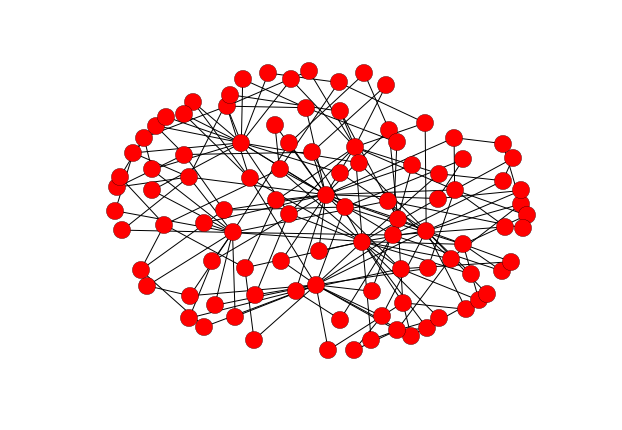

In [162]:
ba=nx.barabasi_albert_graph(100,2,seed=40)
ba_layout = nx.spring_layout(ba, iterations=100)
nx.draw(ba, pos=ba_layout)

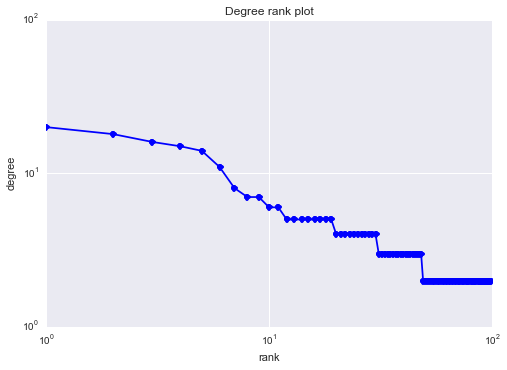

In [163]:
degree_sequence=sorted(nx.degree(ba).values(),reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")